# Visualización Básica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
raw_data = pd.read_csv("../datasets/exercises/downloaded_covid_effects.csv")

In [3]:
raw_data.head()

,Unnamed: 0,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,0,Exports,2015,31/01/2015,Saturday,01/02/2020,All,All,All,$,257000000,257000000
1,1,Exports,2015,01/02/2015,Sunday,02/02/2020,All,All,All,$,123000000,380000000
2,2,Exports,2015,02/02/2015,Monday,03/02/2020,All,All,All,$,176000000,556000000
3,3,Exports,2015,03/02/2015,Tuesday,04/02/2020,All,All,All,$,115000000,671000000
4,4,Exports,2015,04/02/2015,Wednesday,05/02/2020,All,All,All,$,74000000,746000000


In [4]:
data = raw_data
data['Date']=pd.to_datetime(data['Date'])
data['Year']=pd.to_numeric(data['Year'])
data['Value']=pd.to_numeric(data['Value'])
data = data.drop(['Unnamed: 0','Cumulative'],axis=1)
dataUSA = data[data['Country']=='United States']
data.index = data['Date']
dataUSA.index = dataUSA['Date']

In [5]:
data

,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value
Date,,,,,,,,,,
2015-01-31,Exports,2015,2015-01-31,Saturday,01/02/2020,All,All,All,$,257000000
2015-01-02,Exports,2015,2015-01-02,Sunday,02/02/2020,All,All,All,$,123000000
2015-02-02,Exports,2015,2015-02-02,Monday,03/02/2020,All,All,All,$,176000000
2015-03-02,Exports,2015,2015-03-02,Tuesday,04/02/2020,All,All,All,$,115000000
2015-04-02,Exports,2015,2015-04-02,Wednesday,05/02/2020,All,All,All,$,74000000
...,...,...,...,...,...,...,...,...,...,...
2020-12-12,Reimpor,2020,2020-12-12,Saturday,12/12/2020,All,All,All,$,0
2020-12-13,Reimpor,2020,2020-12-13,Sunday,13/12/2020,All,All,All,$,0
2020-12-14,Reimpor,2020,2020-12-14,Monday,14/12/2020,All,All,All,$,0


In [6]:
data = data.resample('W').mean()
dataUSA = dataUSA.resample('W').mean()

In [7]:
data

,Year,Value
Date,,
2015-01-04,2015.0,3.509575e+07
2015-01-11,2015.0,3.200532e+07
2015-01-18,2015.0,3.697782e+07
2015-01-25,NaN,NaN
2015-02-01,2015.0,3.042878e+07
...,...,...
2020-11-22,2020.0,3.757963e+07
2020-11-29,2020.0,3.435098e+07
2020-12-06,2020.0,3.581561e+07


In [8]:
data['Date'] = data.index
dataUSA['Date'] = dataUSA.index

In [9]:
data

,Year,Value,Date
Date,,,
2015-01-04,2015.0,3.509575e+07,2015-01-04
2015-01-11,2015.0,3.200532e+07,2015-01-11
2015-01-18,2015.0,3.697782e+07,2015-01-18
2015-01-25,NaN,NaN,2015-01-25
2015-02-01,2015.0,3.042878e+07,2015-02-01
...,...,...,...
2020-11-22,2020.0,3.757963e+07,2020-11-22
2020-11-29,2020.0,3.435098e+07,2020-11-29
2020-12-06,2020.0,3.581561e+07,2020-12-06


## Scatter Plot

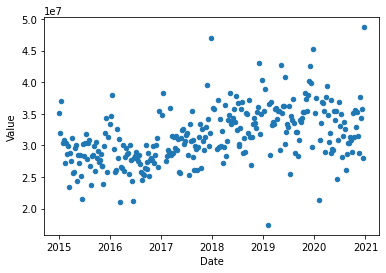

In [10]:
data.plot(kind="scatter", x='Date', y='Value')

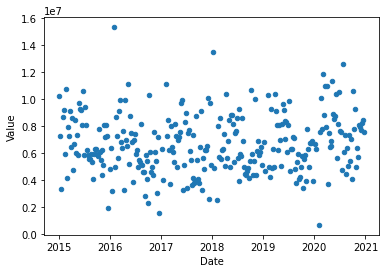

In [11]:
dataUSA.plot(kind="scatter", x='Date', y='Value')

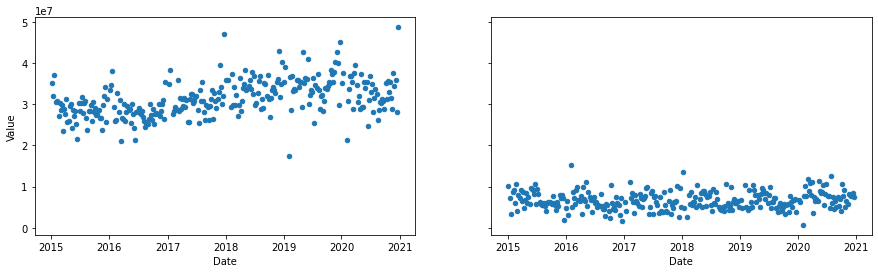

In [12]:
figure, axs = plt.subplots(1,2, sharey=True, sharex=True, figsize=(15,4))
data.plot(kind="scatter", x='Date', y='Value', ax=axs[0])
dataUSA.plot(kind="scatter", x='Date', y='Value', ax=axs[1])

## Histogramas

nº de divisiones: 10


Text(0.5, 1.0, 'Histograma del valor de las importaciones/exportaciones')

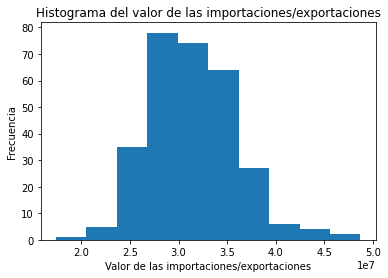

In [13]:
not_nan_data = data[data['Value'].notna()]
k = int(np.ceil(1+np.log2(len(not_nan_data)))) #Regla de Struges para calcular el nº de divisiones
print("nº de divisiones: %d" % (k))
plt.hist(not_nan_data['Value'], bins = k)
plt.xlabel("Valor de las importaciones/exportaciones")
plt.ylabel("Frecuencia")
plt.title("Histograma del valor de las importaciones/exportaciones")

nº de divisiones: 10


Text(0.5, 1.0, 'Histograma del valor de las importaciones/exportaciones')

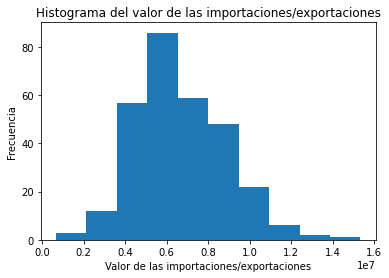

In [16]:
not_nan_data_usa = dataUSA[dataUSA['Value'].notna()]
k = int(np.ceil(1+np.log2(len(not_nan_data_usa)))) #Regla de Struges para calcular el nº de divisiones
print("nº de divisiones: %d" % (k))
plt.hist(not_nan_data_usa['Value'], bins = k)
plt.xlabel("Valor de las importaciones/exportaciones")
plt.ylabel("Frecuencia")
plt.title("Histograma del valor de las importaciones/exportaciones")

## Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f74f4184ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74f4195630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f74f4184be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f74f4195d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f74f41a10f0>],
 'means': []}

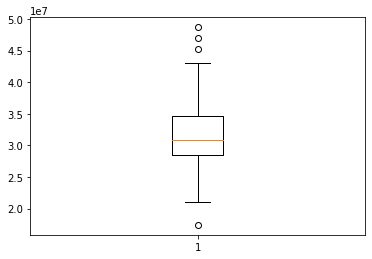

In [14]:
plt.boxplot(not_nan_data['Value'])

In [15]:
not_nan_data['Value'].describe()

count    2.960000e+02
mean     3.141896e+07
std      4.445412e+06
min      1.740255e+07
25%      2.841682e+07
50%      3.088336e+07
75%      3.463165e+07
max      4.869638e+07
Name: Value, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f74f40ede48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74f40fc588>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f74f40edb38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f74f40fcc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f74f4087048>],
 'means': []}

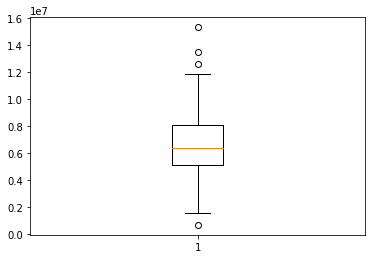

In [17]:
plt.boxplot(not_nan_data_usa['Value'])

In [18]:
not_nan_data_usa['Value'].describe()

count    2.960000e+02
mean     6.683847e+06
std      2.165062e+06
min      6.666667e+05
25%      5.111222e+06
50%      6.381095e+06
75%      8.065762e+06
max      1.533383e+07
Name: Value, dtype: float64